___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

***Clustering (Customer Segmentation) Project***

In this project, customers are segmented according to the purchasing history obtained from the membership cards of a big mall.
Big mall in a specific city that keeps information of its customers who subscribe to a membership card. 

In the membetrship card they provide following information : 
* Gender 
* Age 
* Annual Income. 

The customers use this membership card to make all the purchases in the mall, so the mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. 

Customers are segmented based on the details given. 


## Importing Required Libraries, Loading Dataset, and Exploring Data



#### Import Libraries

In [8]:
!pip install plotly
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#### Load Dataset

In [17]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.columns = ['CustomerID', 'Gender','Age','Annual_Income','Spend_Score']
df.head()

,CustomerID,Gender,Age,Annual_Income,Spend_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual_Income,Spend_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Exploratory Data Analysis (EDA)



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     200 non-null    int64
 1   Gender         200 non-null    int32
 2   Age            200 non-null    int64
 3   Annual_Income  200 non-null    int64
 4   Spend_Score    200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [21]:
df.shape

(200, 5)

In [22]:
df.isnull().sum().any()

False

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.00,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spend_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


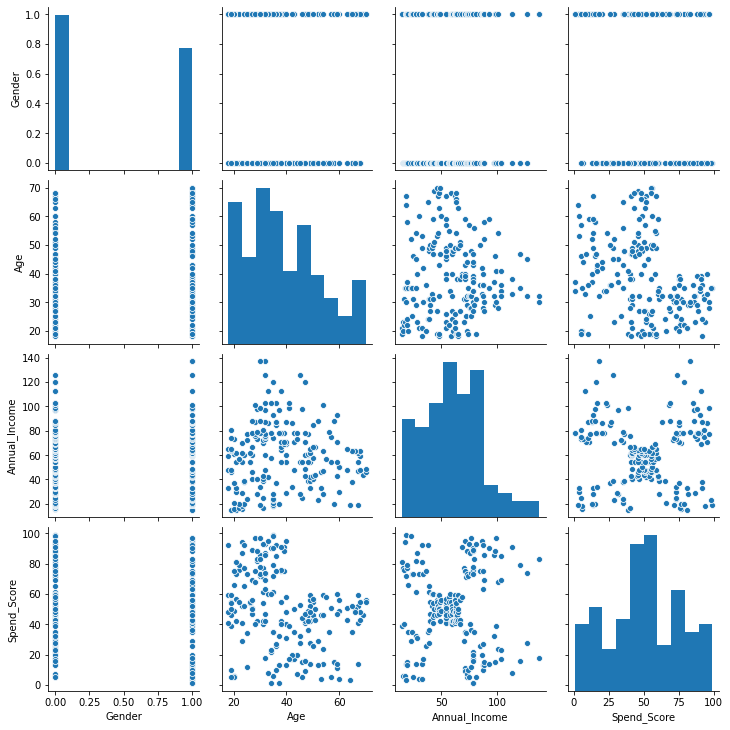

In [24]:
sns.pairplot(df.drop('CustomerID', axis = 1));

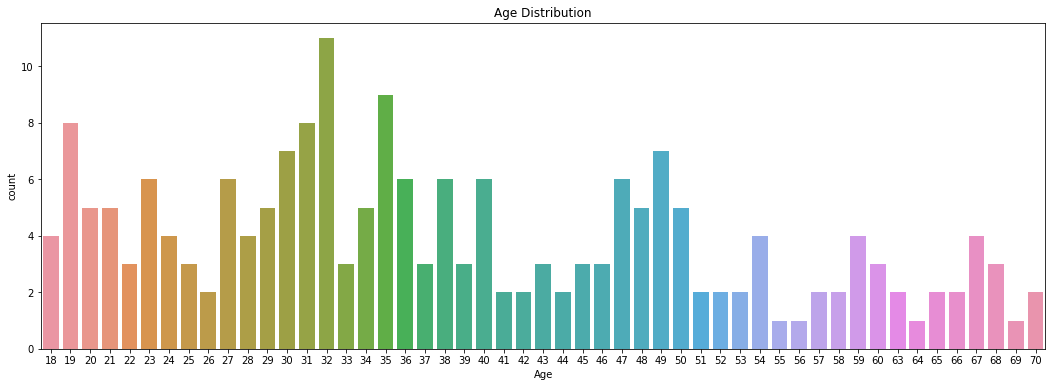

In [44]:
plt.figure(figsize=(18,6))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show();

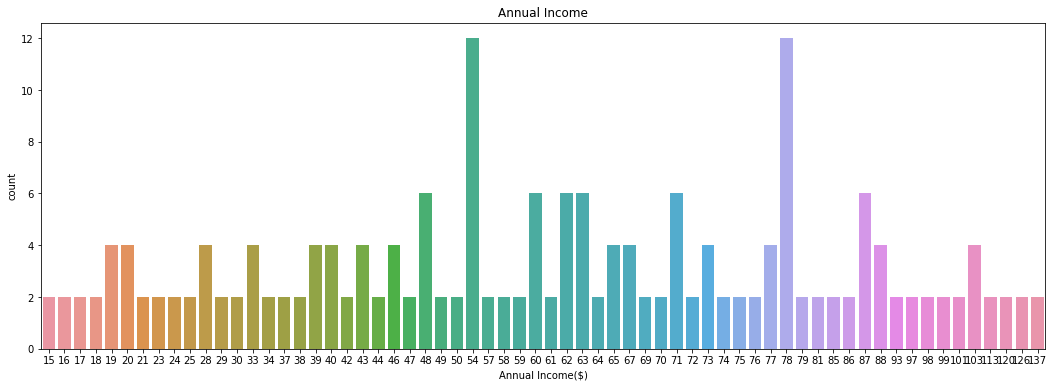

In [43]:
plt.figure(figsize=(18,6))
sns.countplot(df['Annual_Income'])
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show();

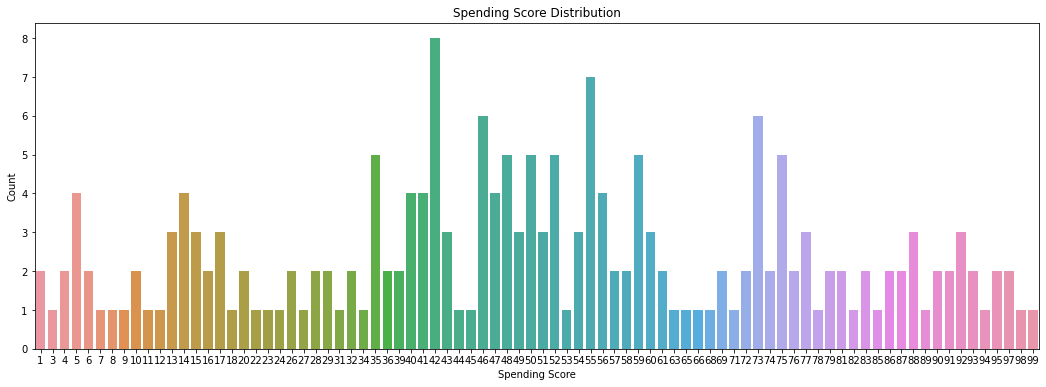

In [42]:
plt.figure(figsize=(18,6))
sns.countplot(df['Spend_Score'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.axis()
plt.show();

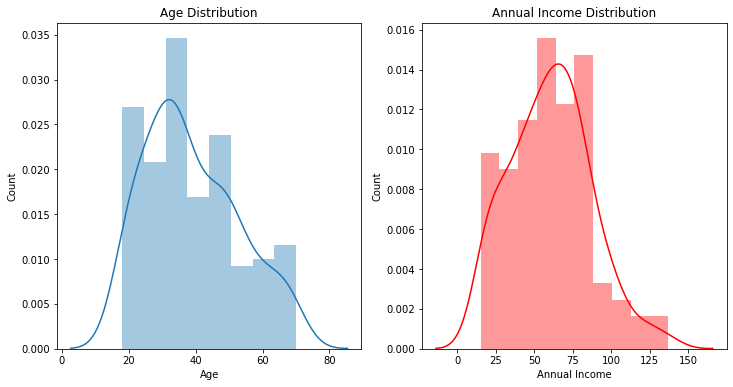

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count');

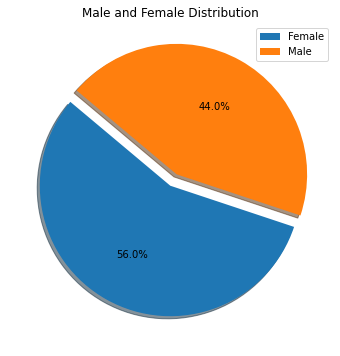

In [39]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');

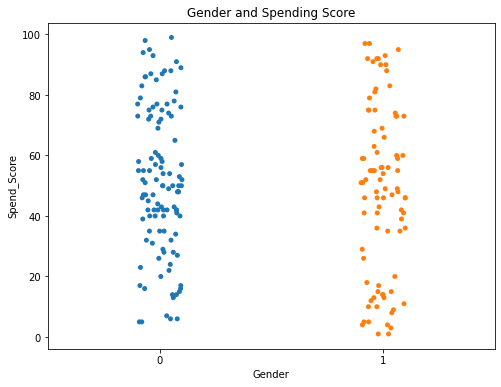

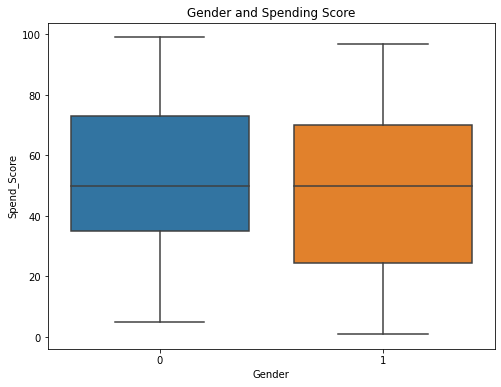

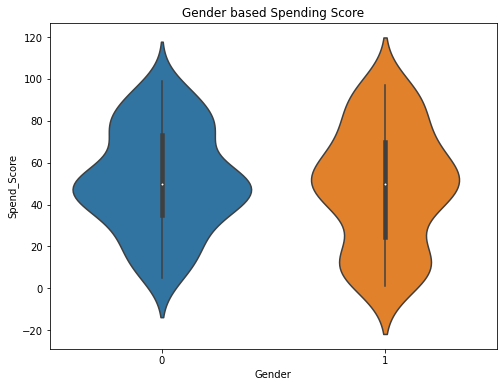

In [34]:
plt.figure(figsize=(8,6))
sns.stripplot(df['Gender'], df['Spend_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(8,6))
sns.boxplot(df['Gender'], df['Spend_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(8,6))
sns.violinplot(df['Gender'],df['Spend_Score'])
plt.title('Gender based Spending Score')
plt.show();

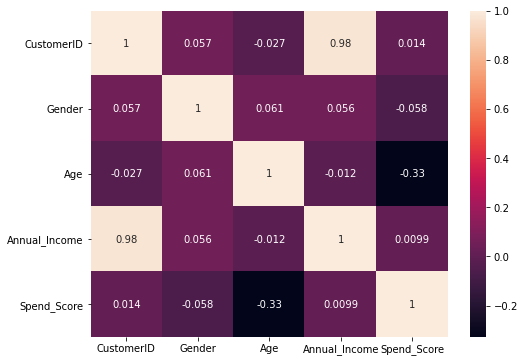

In [32]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True)
plt.show();

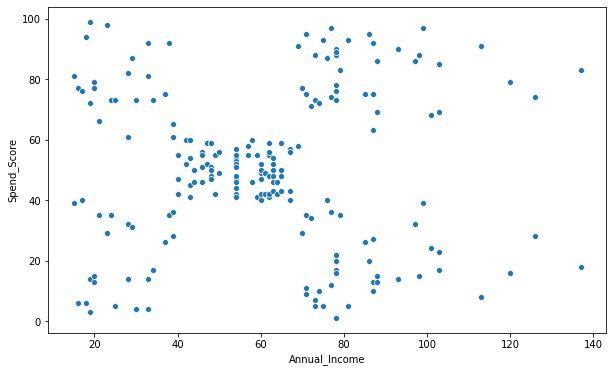

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(df['Annual_Income'], df['Spend_Score'], ax=ax)
plt.show();

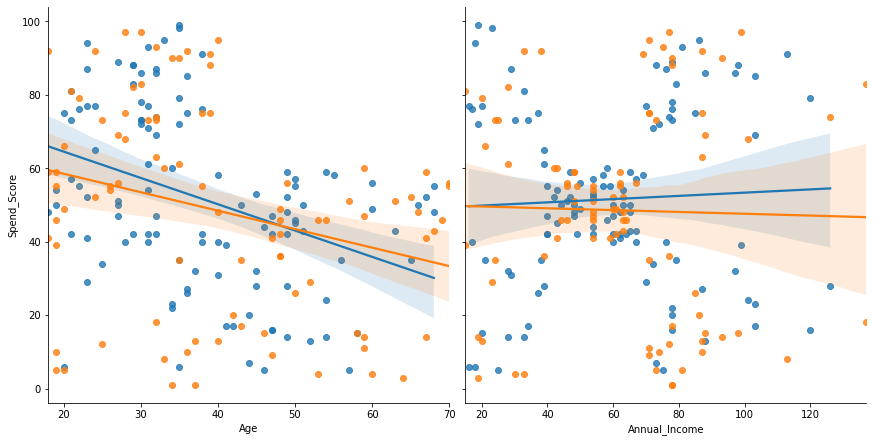

In [48]:
grid = sns.PairGrid(df, y_vars=['Spend_Score'], x_vars=["Age", "Annual_Income"], height=6, hue='Gender')
grid.map(sns.regplot);

## Cluster Analysis

The main purpose of this section is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

[Cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) can be performed using different variables. 

First, the K-Means algorithm expects to determine the number of clusters (*n_clusters*). The optimal number of clusters for each cluster analysis can be determined in various ways. In this case, the [Elbow Method] is used. (https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Hopkins Test
Assess the clusterability of a dataset. 

A score between 0 and 1, a score around 0.5 express no clusterability and 
a score tending to 0 express a high cluster tendency.

In [49]:
from pyclustertend import hopkins
hopkins(df, df.shape[0])

0.17768114183635114

### Clustering based on Age and Spending Score

In [50]:
df1=df[['Age', 'Spend_Score']]

***Hopkins Test***

In [52]:
hopkins(df1, df1.shape[0])

0.2970163912783684

#### *ii. Determine optimal number of clusters*

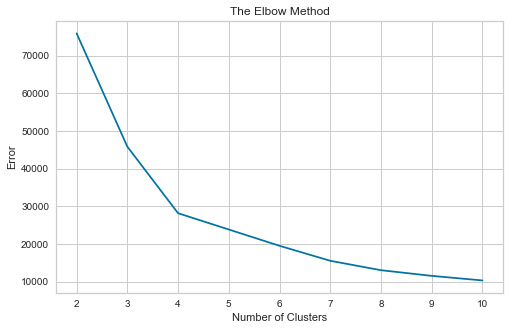

In [56]:
from sklearn.cluster import KMeans
Error =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(df1)
    Error.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), Error)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show();

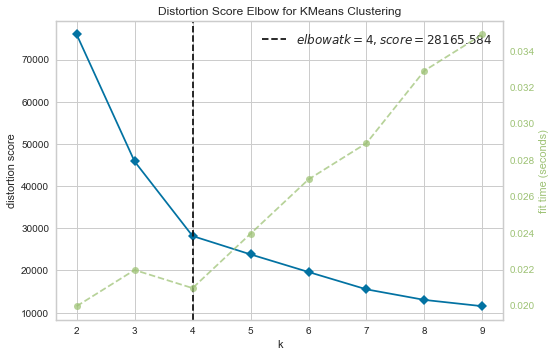

In [51]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df1)
visu.poof();

#### *iii. Apply K Means*

In [57]:
k_means1 =KMeans(n_clusters=4).fit(df1)
labels1 = k_means1.labels_
df1['cluster_id'] = labels1
df1.head()

,Age,Spend_Score,cluster_id
0,19,39,1
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,1


#### *iv. Silhouette Score*

In [58]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(df1, labels1)}')

Silhouette Score(n=4): 0.5005840527210285


#### *v. Visualizing and Labeling All the Clusters*

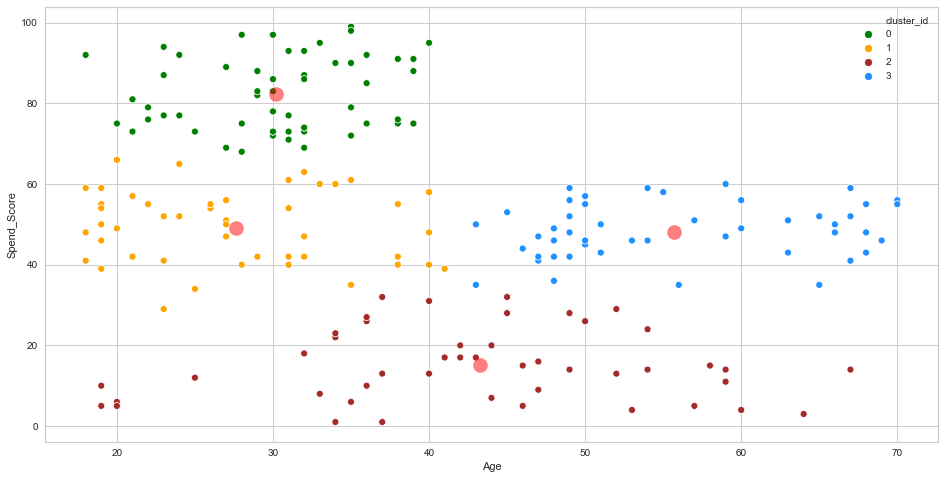

In [62]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Age', y='Spend_Score', hue='cluster_id', data=df1,palette=['green','orange','brown','dodgerblue'], legend='full')
plt.scatter(k_means1.cluster_centers_[:, 0], k_means1.cluster_centers_[:, 1], s=200, c='red',alpha=0.5, label = 'Centroids');

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [64]:
df2=df[['Annual_Income', 'Spend_Score']]

#### *ii. Determine optimal number of clusters*

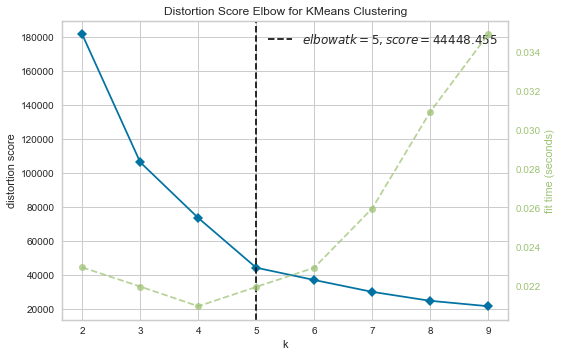

In [65]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df2)
visu.poof();

#### *iii. Apply K Means*

In [66]:
k_means2 =KMeans(n_clusters=5).fit(df2)
labels2 = k_means2.labels_
df2['cluster_id'] = labels2
df2.head()

,Annual_Income,Spend_Score,cluster_id
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


#### *iv. Silhouette Score*

In [67]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df2, labels2)}')

Silhouette Score(n=5): 0.5544077100050893


#### *v. Visualizing and Labeling All the Clusters*

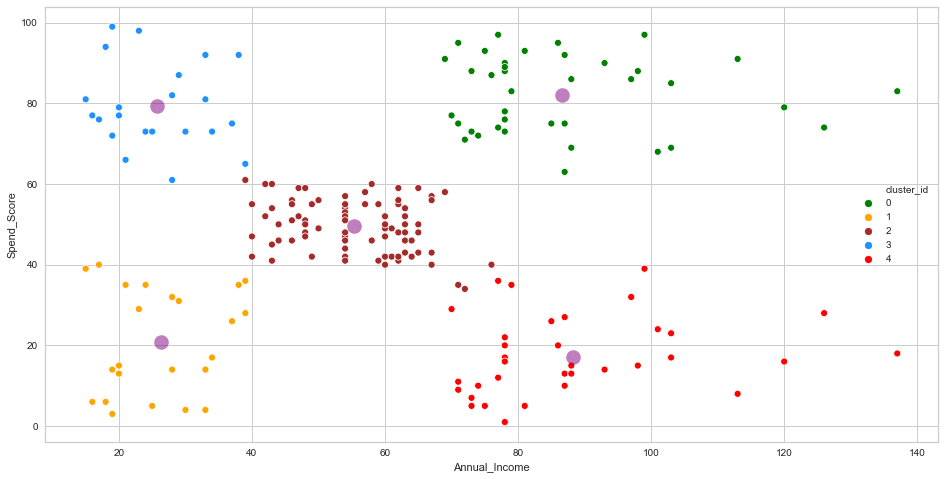

In [71]:
plt.figure(figsize=(16,8))
g=sns.scatterplot(x='Annual_Income', y='Spend_Score', hue='cluster_id', data=df2,palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.scatter(k_means2.cluster_centers_[:, 0], k_means2.cluster_centers_[:, 1], s=200, c='purple',alpha=0.5, label = 'Centroids')

### Clustering based on Age, Income and Spending Score

In [73]:
df3=df[['Age', 'Annual_Income', 'Spend_Score']]
df3.head()

,Age,Annual_Income,Spend_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


#### *ii. Determine optimal number of clusters*

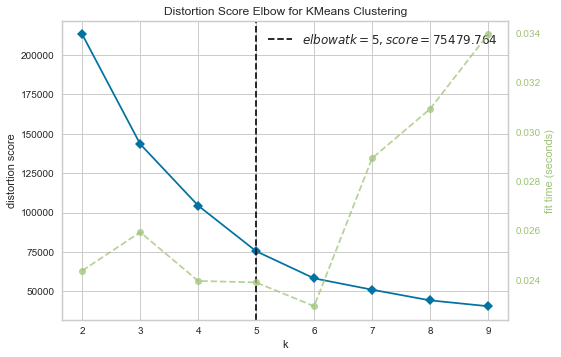

In [74]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df3)
visu.poof();

#### *iii. Apply K Means*

In [76]:
k_means3 =KMeans(n_clusters=5).fit(df3)
labels3 = k_means3.labels_
df3['cluster_id'] = labels3
df3.head(5)

,Age,Annual_Income,Spend_Score,cluster_id
0,19,15,39,0
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,0


#### *iv. Silhouette Score*

In [77]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df3, labels3)}')

Silhouette Score(n=5): 0.4455800097890018


#### *v. Visualizing and Labeling All the Clusters*

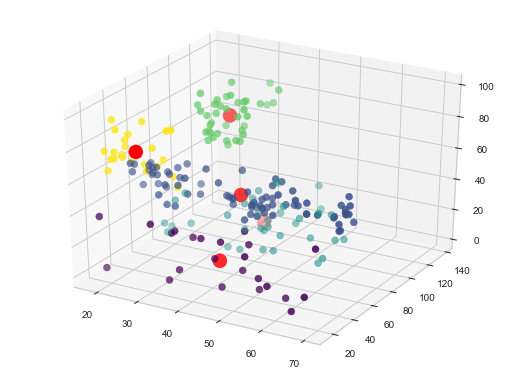

In [87]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=5).fit(df3)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df3.iloc[:,0],df3.iloc[:,1],df3.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="o",s = 200);

In [96]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
df3['cluster_id'] =  k_means3.labels_
trace1 = go.Scatter3d(
    x = df3['Age'],
    y = df3['Spend_Score'],
    z = df3['Annual_Income'],
    mode ='markers',
    marker = dict(color = df3['cluster_id'], size = 6, line = dict(color= df3['cluster_id'], width= 12), opacity = 0.8)) 
data = [trace1]
layout = go.Layout(title= 'Customers Segmentation', scene = dict(xaxis = dict(title  = 'Age'), yaxis = dict(title  = 'Spend Score'), zaxis = dict(title  = 'Annual Income')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

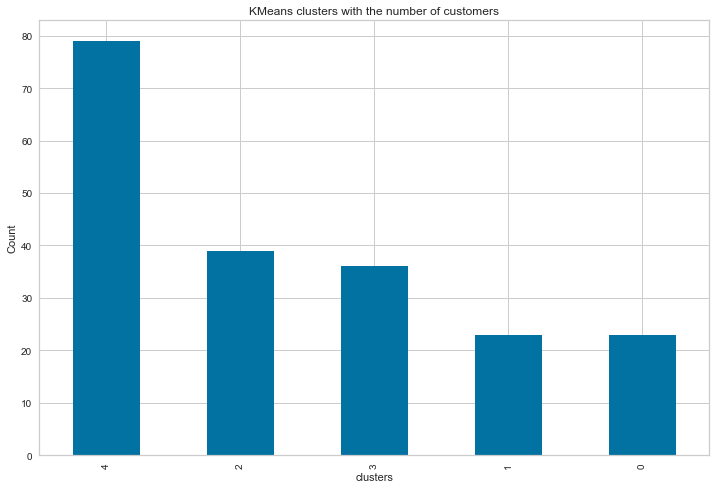

In [108]:
plt.title("KMeans clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df3.cluster_id.value_counts().plot(kind='bar');

In [111]:
df3.groupby("cluster_id").mean()

,Age,Annual_Income,Spend_Score
cluster_id,,,
0,45.217391,26.304348,20.913043
1,25.521739,26.304348,78.565217
2,32.692308,86.538462,82.128205
3,40.666667,87.750000,17.583333
4,43.088608,55.291139,49.569620


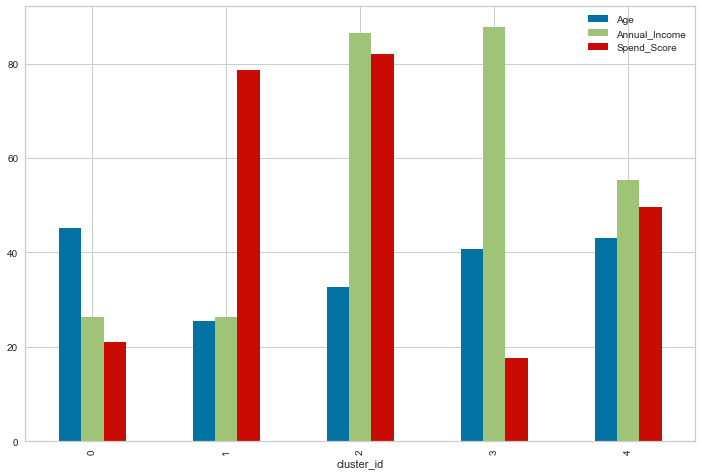

In [113]:
df3.groupby(df3.cluster_id).mean().plot(kind='bar')
plt.show();

### Hierarchical Clustering

In [98]:
df4=df[['Age', 'Annual_Income', 'Spend_Score']]
df4.head()

,Age,Annual_Income,Spend_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


#### *i. Determine optimal number of clusters using Dendogram*

In [99]:
from scipy.cluster.hierarchy import linkage, dendrogram
hc_complete =  linkage(df4,"complete")
hc_ward = linkage(df4, "ward")

plt.figure(figsize = (16,8))
plt.title("Dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

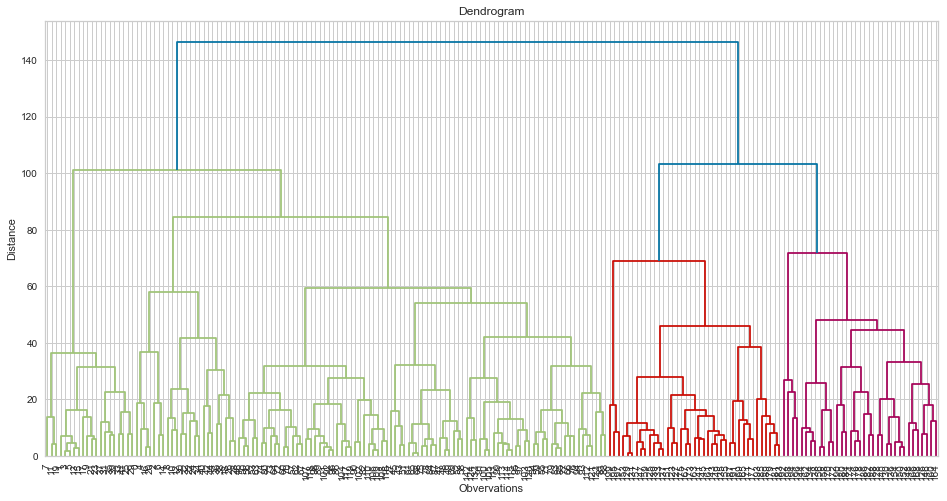

In [100]:
plt.figure(figsize = (16,8))
plt.title("Dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

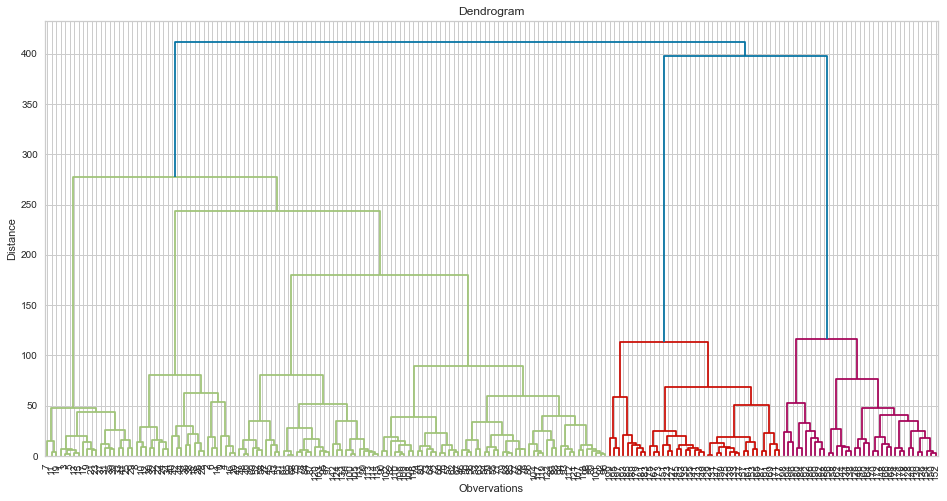

In [101]:
plt.figure(figsize = (16,8))
plt.title("Dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [102]:
from sklearn.cluster import AgglomerativeClustering
model_ais = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward')
model_ais.fit_predict(df4)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [103]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df4, model_ais.labels_)}')

Silhouette Score(n=5): 0.4401889024290193


#### iv. *Visualizing and Labeling All the Clusters* 

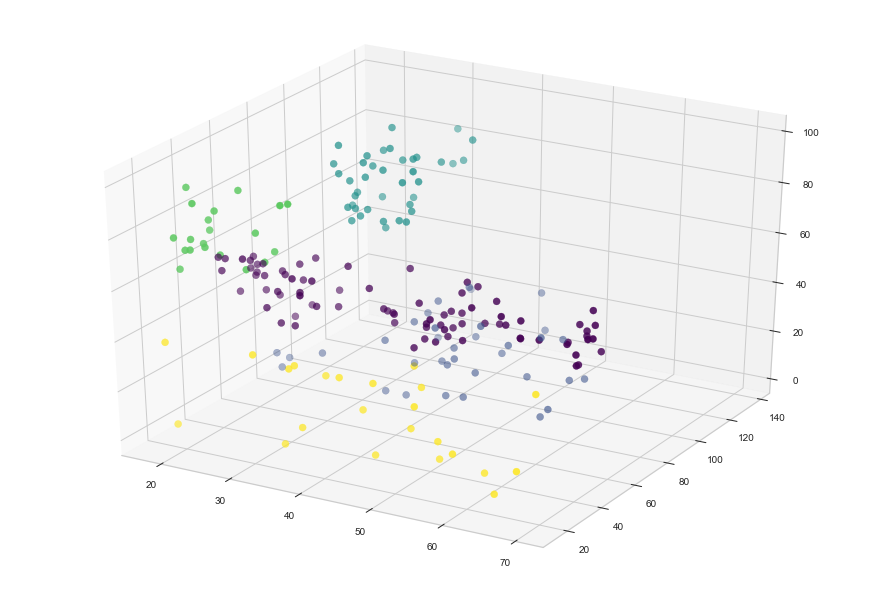

In [28]:
from mpl_toolkits.mplot3d import Axes3D
model_ais = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward')
model_ais.fit_predict(df4)
clusters= model_ais.labels_
centers = model_ais.n_clusters

plt.rcParams["figure.figsize"] =(12,8)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df4.iloc[:,0],df4.iloc[:,1],df4.iloc[:,2],c = clusters, s = 50,cmap = "viridis");



In [106]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
df4['cluster_id'] =  model_ais.labels_
trace1 = go.Scatter3d(
    x = df4['Age'],
    y = df4['Spend_Score'],
    z = df4['Annual_Income'],
    mode ='markers',
    marker = dict(color = df4['cluster_id'], size = 6, line = dict(color= df4['cluster_id'], width= 12), opacity = 0.8)) 
data = [trace1]
layout = go.Layout(title= 'Customers Segmentation', scene = dict(xaxis = dict(title  = 'Age'), yaxis = dict(title  = 'Spend Score'), zaxis = dict(title  = 'Annual Income')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

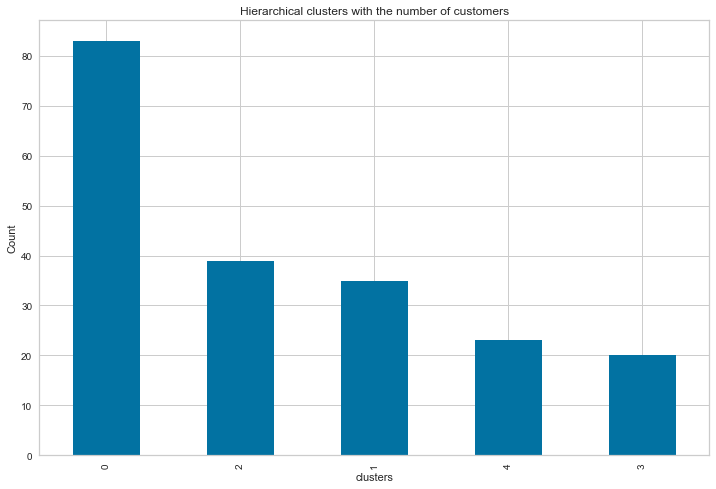

In [117]:
plt.title("Hierarchical clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df4.cluster_id.value_counts().plot(kind='bar');

In [110]:
df4.groupby("cluster_id").mean()

,Age,Annual_Income,Spend_Score
cluster_id,,,
0,42.156627,54.759036,49.771084
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205
3,24.850000,24.950000,81.000000
4,45.217391,26.304348,20.913043


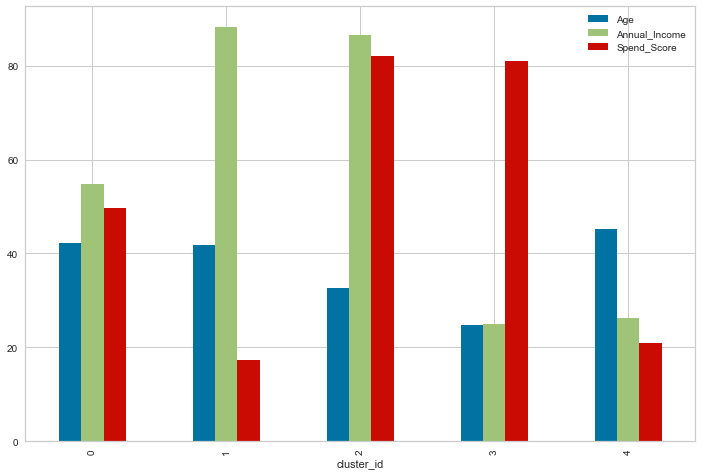

In [118]:
df4.groupby(df4.cluster_id).mean().plot(kind='bar')
plt.show();

### KMeans Clustering vs. Hieararchical Clustering
(Clustering based on Age, Income and Spending Score)

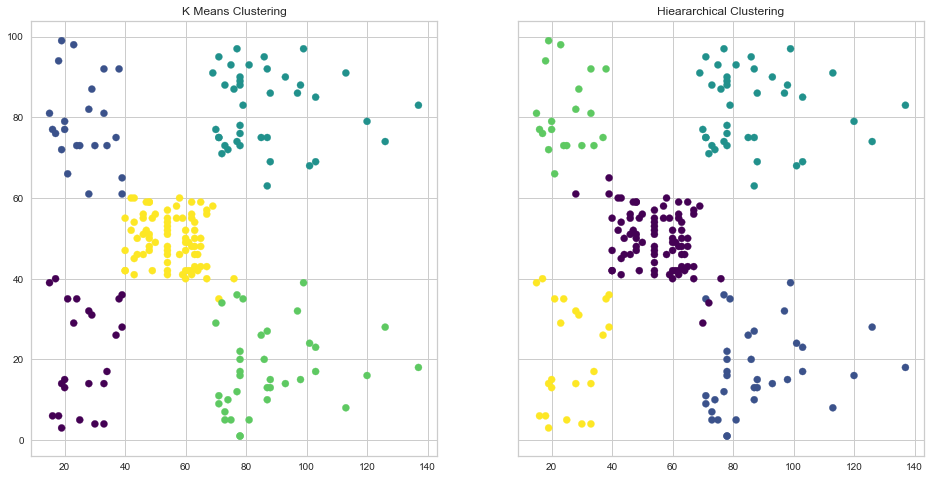

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(16,8))
ax1.set_title('K Means Clustering')
ax1.scatter(df3.iloc[:,1], df3.iloc[:,2], c = k_means3.labels_, s = 50, cmap = "viridis")
ax2.set_title("Hieararchical Clustering")
ax2.scatter(df4.iloc[:,1], df4.iloc[:,2], c = model_ais.labels_, s = 50, cmap = "viridis");

### Conclusion

According to the KMeans Clustering with Age, Annual Income and Spending Score, 5 clusters are as follows;

+ 1st group(Red) :High income (80-140K), Low Age (20-40), and High spending score (60-100)

+ 2nd group(Blue) :Low income (0-40K), low spending score (0-40) across all ages group

+ 3rd group(Purple) :Low income (20-40K), high spending score (60-100) between the age of 20 and 40

+ 4th group(Orange) :High income(70-140K), low spending score (0-40) between the age of 20 and 60

+ 5th group(Yellow) :Moderate income (40-70K), moderate spending score (40-60) across all ages group

Hiearchical Clustering results in almost identical clustering (n= 5) with small instance differences

As a result of these clustering, different campaigns could be administered to them. 



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___